In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression #para hacer regresiones lineales
from sklearn.cross_validation import train_test_split #para separar datos entre datos de test y entrenamiento
from sklearn import metrics # para medir (metricas) errores, etc.

Populating the interactive namespace from numpy and matplotlib


/Users/daniellozano/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
FILE=open("wine.dat").read().split('\n')
print FILE[0].split(','), size(FILE[0].split(','))
print float(FILE[0].split(',')[0])
print "Aqui",(FILE[-1])

['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28', '2.29', '5.64', '1.04', '3.92', '1065'] 14
1.0
Aqui 


In [3]:
WINE=zeros([len(FILE)-1,size(FILE[0].split(',')),])
print len(FILE[0].split(','))
print FILE[0].split(',')
print len(FILE)

14
['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28', '2.29', '5.64', '1.04', '3.92', '1065']
179


In [4]:
for i in range(len(FILE)-1):
    for j in range(len(FILE[0].split(','))):
        WINE[i][j]=float(FILE[i].split(',')[j])

In [5]:
print WINE[-1,:]
print shape(WINE)

[   3.     14.13    4.1     2.74   24.5    96.      2.05    0.76    0.56
    1.35    9.2     0.61    1.6   560.  ]
(178, 14)


$ 1)\ Type\ \\ 
2)\ Alcohol\ \\
3)\ Malic acid\  \\
4)\ Ash\  \\
5)\ Alcalinity\ of\ ash\ \\
6)\ Magnesium\ \\
7)\ Total phenols\ \\
8)\ Flavanoids\ \\
9)\ Nonflavanoid phenols\ \\ 
10)\ Proanthocyanins\ \\
11)\ Color intensity\ \\
12)\ Hue\ \\
13)\ OD280/OD315 of diluted wines\ \\
14)\ Proline\ $ 

In [6]:
print np.var(WINE[:,1])
a=np.sqrt(np.var(WINE[:,1]))
print np.var(WINE[:,1]/a)

0.655359730463
1.0


# PCA

In [7]:
#Paquete de PCA
from sklearn.decomposition import PCA
pca = PCA()#n_components=len(WINE[:,0]))

In [8]:
W=zeros([len(WINE[:,0]),len(WINE[0,:])-1])
print shape(W),shape(WINE)

for i in range(len(W[0,:])):
    W[:,i]=WINE[:,i+1]-np.mean(WINE[:,i+1])
    W[:,i]=W[:,i]/np.sqrt(np.var(W[:,i])) # creando arreglo de varianza=1 y media aproximadamente 0
    
    print np.sqrt(np.var(W[:,i])),np.mean(W[:,i]) #varianza

(178, 13) (178, 14)
1.0 -8.38280755672e-16
1.0 -1.19754393667e-16
1.0 -8.37033314071e-16
1.0 -3.99181312225e-17
1.0 -3.99181312225e-17
1.0 0.0
1.0 -3.99181312225e-16
1.0 3.59263181002e-16
1.0 -1.39713459279e-16
1.0 2.4948832014e-17
1.0 1.99590656112e-16
1.0 3.1934504978e-16
1.0 -1.5967252489e-16


In [9]:
pca.fit(W)#se hace el analisis de PCA

PCA(copy=True, n_components=None, whiten=False)

In [10]:
shape(pca.components_)#Hay 13 componentes ya que hay 13 caracteristicas, Min (178-1,13)=13

(13, 13)

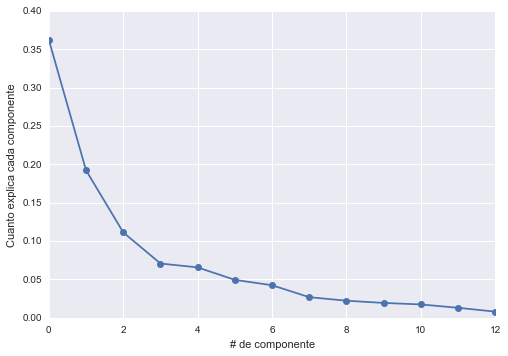

In [11]:
plot(pca.explained_variance_ratio_,"-o")
xlabel("# de componente")
ylabel("Cuanto explica cada componente")

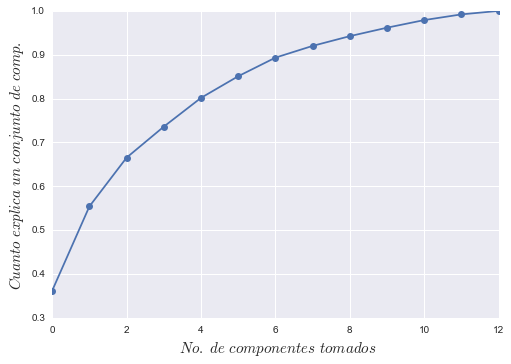

In [12]:
Suma=zeros(len(pca.explained_variance_ratio_))
suma=0
for i in range(len(Suma)):
    suma+=pca.explained_variance_ratio_[i]
    Suma[i]=suma

plot(Suma,"-o")    
xlabel(" $ No.\ de\ componentes\ tomados\ $",size=15)
ylabel("$ Cuanto\ explica\ un\ conjunto\ de\ comp.\ $",size=15)

In [13]:
print pca.explained_variance_ratio_,"\n"
print pca.explained_variance_

[ 0.36198848  0.1920749   0.11123631  0.0706903   0.06563294  0.04935823
  0.04238679  0.02680749  0.02222153  0.01930019  0.01736836  0.01298233
  0.00795215] 

[ 4.70585025  2.49697373  1.44607197  0.91897392  0.85322818  0.64165703
  0.55102831  0.34849736  0.28887994  0.25090248  0.22578864  0.16877023
  0.10337794]


In [14]:
suma=0
for i in range(len(pca.explained_variance_ratio_)):
    suma+=pca.explained_variance_ratio_[i]
    print "PVE=",suma,"Numero de componentes",i+1


PVE= 0.361988480999 Numero de componentes 1
PVE= 0.554063383569 Numero de componentes 2
PVE= 0.665299688932 Numero de componentes 3
PVE= 0.735989990759 Numero de componentes 4
PVE= 0.801622927555 Numero de componentes 5
PVE= 0.850981160748 Numero de componentes 6
PVE= 0.893367953974 Numero de componentes 7
PVE= 0.920175443458 Numero de componentes 8
PVE= 0.942396977506 Numero de componentes 9
PVE= 0.961697168445 Numero de componentes 10
PVE= 0.979065525345 Numero de componentes 11
PVE= 0.992047851101 Numero de componentes 12
PVE= 1.0 Numero de componentes 13


### $ Hecho\ el\ análisis\ de\ PCA\ notamos\ que\ un\ número\ óptimo\ de\ componentes\ principales\ es\ 10\ ya\ que\ estos\ explican\ el\ 96\ porciento\ de\ varianza\ de\ los\ datos\ sin\ embargo\ se\ puede\ ver\ que\ los\ dos\ primeros\ 2\ componentes\ explican\ un\ 50\ porciento\ de la varianza\ $

# K_mean

In [15]:
from sklearn import cluster, datasets

In [16]:
k_means = cluster.KMeans(n_clusters=3)#numero de clusters que hara el metodo
k_means.fit(WINE[:,1:]) #hace el fit de los clusters
print "inertia",k_means.inertia_ #suma de la distancia euclidiana de cada punto a su centroide


inertia 2370689.68678


11


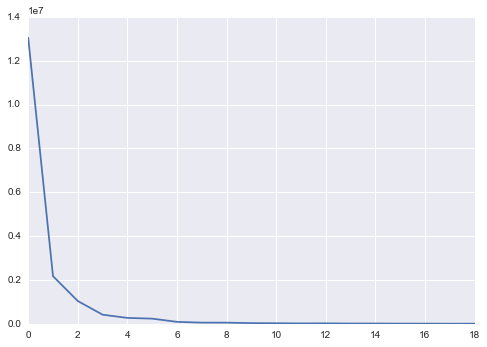

In [17]:
inertia=[]
dif=[]
k=20
for i in range(k):
    k_means = cluster.KMeans(n_clusters=i+1)#numero de clusters que hara el metodo
    k_means.fit(WINE[:,1:]) #hace el fit de los clusters
    k_means.inertia_
    inertia.append(k_means.inertia_) #Arreglo que contiene la suma de distancias de puntos al centroide mas cercano
    
for i in range(len(inertia)-1):
    dif.append(abs(inertia[i]-inertia[i+1])) # arreglo que compara la distancia que hay con k clusters con la de k+1

b=0 # variable que busca el primer cambio de inertia a un valor mayor
for i in range(len(dif)-1):
    a=dif[i]
    if(a<dif[i+1] and b==0):
        print i
        b=1      
#plot(inertia,"-o")  
plot(dif)

In [18]:
# Aqui estamos buscando
corridas=100
cambio=zeros(corridas)

for j in range(len(cambio)):
    
    #Haciendo el analisis de clusters
    inertia=[]
    dif=[]
    k=16
    for i in range(k):
        k_means = cluster.KMeans(n_clusters=i+1)#numero de clusters que hara el metodo
        k_means.fit(WINE[:,1:]) #hace el fit de los clusters
        k_means.inertia_
        inertia.append(k_means.inertia_) #Arreglo que contiene la suma de distancias de puntos al centroide mas cercano
   
    #mirando como cambia la inertia
    for i in range(len(inertia)-1):
        dif.append(inertia[i]-inertia[i+1]) # arreglo que compara la distancia que hay con k clusters con la de k+1

    #buscando la variable donde hay un cambio menor al 10%, se busca un cabio significativo
    for i in range(len(inertia)-1):
        a=dif[i]
        A=inertia[i]
        if(a/A<0.1 and cambio[j]==0):
            cambio[j]=i # si el valor se mantiene en 0 significa que la cadena de inertia siempre disminuyo mas del 10%
  

[(13.0, 34), (14.0, 23), (12.0, 19), (11.0, 13), (0.0, 4), (10.0, 4), (9.0, 3)]

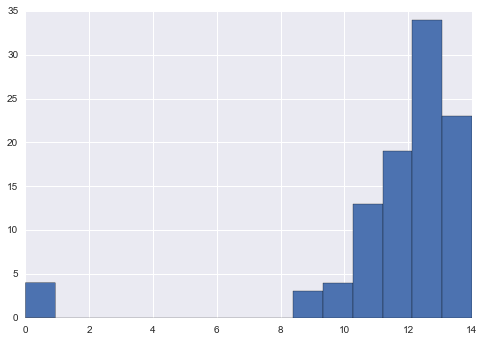

In [30]:
hist(cambio,bins=15) #Aqui estamos buscando el numero en el cual cambia más el numero de inertia a un valor
from collections import Counter
data = Counter(cambio)
data.most_common()   # Returns all unique items and their counts


#### $ Hemos\ buscado\ el\ numero\ de\ clusters\ para\ el\ cual\ se\ disminuye\ la\ inercia en\ menos\ del\ 10\ porciento\ del\ valor\ anterior\,\ dado\ que\ el\ metodo\
 tiene\ una\ base\ de\ escogencia\ random\ buscamos\ un\ dato\ estadistico\ que\ de\ el\ numero\ optimo\ de\ clusters,\ por\ esta\ razon\ haciendo\ una\ corrida\ del\ método\ k-mean\ 100\ veces\ hemos\ hallado\ que\ con\ 13\ clusters\ se\ tiene\ una\ buena\ clasificación\ $

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
Clas=WINE[:,0]
X=WINE[:,1:]
print size(Clas),shape(X)

178 (178, 13)



$ Queremos\ predecir\ la\ clasificación\ del\ vino\ en\ los\ tipos\ 1,\ 2\ y\ 3\ $

In [22]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X[:50], Clas[:50])
print Clas[:50]

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


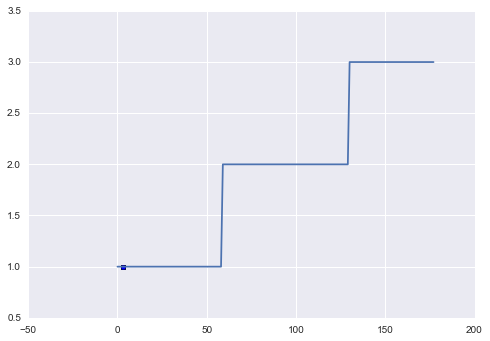

In [23]:
prediction = rf.predict(X[150:]) #mira como se comporta del dato 200 para adelante
plt.scatter(Clas[150:], prediction)
plt.plot(Clas)

(array([ 59.,   0.,   0.,   0.,   0.,  71.,   0.,   0.,   0.,  48.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

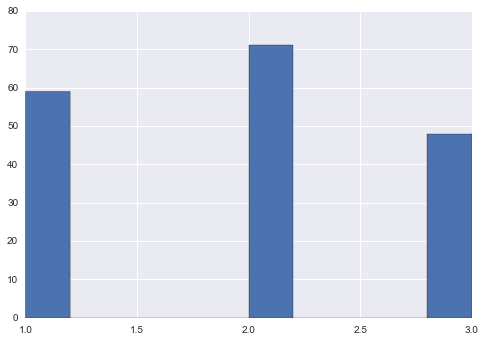

In [24]:
hist(Clas)